In [307]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix , precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [308]:
iris = load_iris()
#make data ready for binary classification
#take only first 2 feature and the two non-linearly separable classes are labeled with the same category
X = iris.data[:,:2]
y = (iris.target != 0) * 1

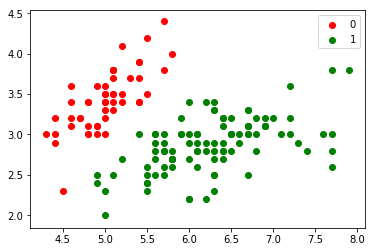

In [309]:
plt.scatter(x=X[y==0][:,0],y=X[y==0][:,1],color='red',label='0')
plt.scatter(x=X[y==1][:,0],y=X[y==1][:,1],color='green',label='1')
plt.legend()

In [310]:
class LogisticRegression_o:
    def __init__(self,lr=0.01,num_itre = 5000,fit_intercept=True,verbose=False):
        self.lr = lr
        self.num_itre = num_itre
        self.fit_intercept =fit_intercept
        self.verbose = verbose
        
    def __add_intercept(self):
        intercept = np.ones((X.shape[0],1))
        return np.concatenate((intercept,X) , axis=1)
    
    def __sigmoid(self,z):
        return 1/(1+np.exp(-z))
    
    def __loss(self,hypo,y):
        return (-y*np.log(hypo) + (1-y)*np.log(1-hypo)).mean()
    
    def fit(self,X,y):
        if self.fit_intercept:
            X = self.__add_intercept()
        self.theta = np.zeros(X.shape[1])
        for i in range(self.num_itre):
            z = np.dot(X,self.theta)
            hypo = self.__sigmoid(z)
            gre = np.dot(hypo-y , X) / y.shape[0]
            self.theta = self.theta - self.lr* gre
            if self.verbose==True and i%10000 == 0:
                z = np.dot(X,self.theta)
                hypo = self.__sigmoid(z)
                print(f'loss: {self.__loss(hypo)}')
                
    def predict_prob(self,X):
        if self.fit_intercept:
            X = self.__add_intercept()
        z = np.dot(X,self.theta)
        return self.__sigmoid(z)
    
    def predict(self,X,threshold=0.5):
        return self.predict_prob(X) >= threshold

In [311]:
lr = LogisticRegression_o(lr=0.1,num_itre=300000)
lr.fit(X,y)
pre = lr.predict(X)
(pre == y).mean()

1.0

In [312]:
t = lr.theta
t

array([-25.89066442,  12.523156  , -13.40150447])

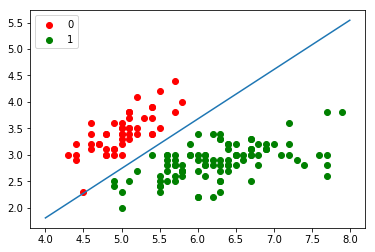

In [313]:
plt.scatter(x=X[y==0][:,0],y=X[y==0][:,1],color='red',label='0')
plt.scatter(x=X[y==1][:,0],y=X[y==1][:,1],color='green',label='1')
plt.legend()

#plot θ.T * X = 0
#plot the line defined by theta[0] + theta[1]*x + theta[2]*y = 0

de_x = np.linspace(4,8,50)
de_y = -(t[0]+t[1] * de_x)/t[2]
plt.plot(de_x,de_y)

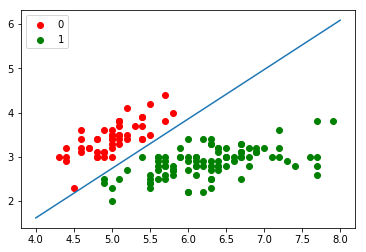

In [314]:
#using sklearn libray
X = iris.data[:,:2]
y = (iris.target != 0) * 1
model = LogisticRegression(C=1e20,solver='liblinear')
model.fit(X,y)
pre1 = model.predict(X)
(y==pre1).mean()

plt.scatter(x=X[y==0][:,0],y=X[y==0][:,1],color='red',label='0')
plt.scatter(x=X[y==1][:,0],y=X[y==1][:,1],color='green',label='1')
plt.legend()

#plot θ.T * X = 0
#plot the line defined by theta[0] + theta[1]*x + theta[2]*y = 0

de_x = np.linspace(4,8,50)
de_y = -(model.intercept_+model.coef_[0][0] * de_x)/model.coef_[0][1]
plt.plot(de_x,de_y)

Binary classification with more number of feature

In [315]:
heart_data = pd.read_csv('../input/heart-disease-uci/heart.csv')
#heart_data=heart_data.sample(frac=1) #shuffle the data

X = heart_data.iloc[:,:-1]
y = heart_data.iloc[:,-1]
print(heart_data['target'].value_counts())

1    165
0    138
Name: target, dtype: int64


In [316]:
print(heart_data.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [317]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [318]:
import seaborn as sns
plt.figure(figsize=(12,13))
cor = heart_data.corr().round(2)
#sns.heatmap(data=cor,annot=True)

<Figure size 864x936 with 0 Axes>

In [319]:
#handle categorical data
def coder(X_1,col_name):
    label = LabelEncoder()
    X_1 = label.fit_transform(X_1)
    X_1 = X_1.reshape(len(X_1),1)
    one = OneHotEncoder(categories='auto',sparse=False)
    X_1 = one.fit_transform(X_1)
    df = pd.DataFrame(X_1)
    df = rename_col(df,col_name)
    return df
def rename_col(df,col_name):
    col_name_list=[]
    for i in range(len(df.columns)):
        col_name_list.append(col_name+'_'+ str(i))
    df.columns = col_name_list
    return df

In [320]:
new_sex = coder(heart_data['sex'],'sex').astype(float)
new_cp = coder(heart_data['cp'],'cp').astype(float)
new_fbs = coder(heart_data['fbs'],'fbs').astype(float)
new_exang = coder(heart_data['exang'],'exang').astype(float)
new_slope = coder(heart_data['slope'],'slope').astype(float)
new_ca = coder(heart_data['ca'],'ca').astype(float)
new_thal = coder(heart_data['thal'],'thal').astype(float)
new_restecg = coder(heart_data['restecg'],'restecg').astype(float)
new_age = heart_data['age'].astype(float)
new_trestbps = heart_data['trestbps'].astype(float)
new_chol = heart_data['chol'].astype(float)
new_oldpeak = heart_data['oldpeak'].astype(float)
new_thalach = heart_data['thalach'].astype(float)

In [321]:
#New X
X = pd.concat([new_age,new_sex,new_trestbps,new_chol,new_fbs,new_restecg,new_thalach,new_exang,
              new_oldpeak,new_slope,new_ca,new_thal],axis=1)
X.columns
X.head()

,age,sex_0,sex_1,trestbps,chol,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,thalach,exang_0,exang_1,oldpeak,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63.0,0.0,1.0,145.0,233.0,0.0,1.0,1.0,0.0,0.0,150.0,1.0,0.0,2.3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,37.0,0.0,1.0,130.0,250.0,1.0,0.0,0.0,1.0,0.0,187.0,1.0,0.0,3.5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,41.0,1.0,0.0,130.0,204.0,1.0,0.0,1.0,0.0,0.0,172.0,1.0,0.0,1.4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,56.0,0.0,1.0,120.0,236.0,1.0,0.0,0.0,1.0,0.0,178.0,1.0,0.0,0.8,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,57.0,1.0,0.0,120.0,354.0,1.0,0.0,0.0,1.0,0.0,163.0,0.0,1.0,0.6,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [322]:
from sklearn.preprocessing import MinMaxScaler
pre = MinMaxScaler()
X = pre.fit_transform(X)
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.708333,0.0,1.0,0.481132,0.244292,0.0,1.0,1.0,0.0,0.0,0.603053,1.0,0.0,0.370968,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,0.0,1.0,0.339623,0.283105,1.0,0.0,0.0,1.0,0.0,0.885496,1.0,0.0,0.564516,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.250000,1.0,0.0,0.339623,0.178082,1.0,0.0,1.0,0.0,0.0,0.770992,1.0,0.0,0.225806,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.562500,0.0,1.0,0.245283,0.251142,1.0,0.0,0.0,1.0,0.0,0.816794,1.0,0.0,0.129032,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.583333,1.0,0.0,0.245283,0.520548,1.0,0.0,0.0,1.0,0.0,0.702290,0.0,1.0,0.096774,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [323]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=100,shuffle=True)
X_train.shape , X_test.shape

((242, 26), (61, 26))

In [324]:
#select diffrent method
def cal(method,c=1,p='l2'):
    lr = LogisticRegression(C=c,solver=method,penalty=p)
    lr.fit(X_train,y_train)
    pre_test = lr.predict(X_test)
    pre_train = lr.predict(X_train)
    train_score = accuracy_score(y_train,pre_train)
    test_score = accuracy_score(y_test,pre_test)
    cm = confusion_matrix(y_test,pre_test)
    
    TP = cm[1][1]
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[0][0]
    Precision = precision_score(y_test,pre_test)
    Recall = recall_score(y_test,pre_test)
    return train_score,test_score,TP,FP,FN,TN,Precision,Recall


In [325]:
method = ['newton-cg','lbfgs','liblinear','sag','saga']
train_list , test_list , TP_list,FP_list,FN_list,TN_list,Precision_list,Recall_list =[],[],[],[],[],[],[],[]

In [326]:
for i in method:
    method_df = pd.DataFrame()
    train_score,test_score,TP,FP,FN,TN,Precision,Recall = cal(i)
    train_list.append(train_score)
    test_list.append(test_score)
    TP_list.append(TP)
    FP_list.append(FP)
    FN_list.append(FN)
    TN_list.append(TN)
    Precision_list.append(Precision)
    Recall_list.append(Recall)
method_df['method'] = method
method_df['train_score'] = train_list
method_df['test_score'] = test_list
method_df['TP'] = TP_list
method_df['FP'] = FP_list
method_df['FN'] = FN_list
method_df['TN'] = TN_list
method_df['Precision'] = Precision_list
method_df['Recall'] = Recall_list
method_df

,method,train_score,test_score,TP,FP,FN,TN,Precision,Recall
0,newton-cg,0.842975,0.852459,26,7,2,26,0.787879,0.928571
1,lbfgs,0.842975,0.852459,26,7,2,26,0.787879,0.928571
2,liblinear,0.842975,0.852459,26,7,2,26,0.787879,0.928571
3,sag,0.842975,0.852459,26,7,2,26,0.787879,0.928571
4,saga,0.842975,0.852459,26,7,2,26,0.787879,0.928571


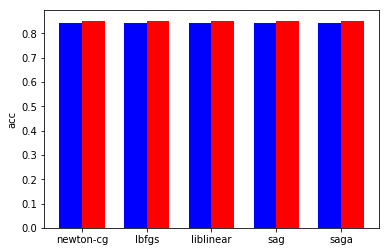

In [327]:
N=5
ind = np.arange(N)
width=0.35
plt.bar(ind,train_list,width,color='b',label='Train acc')
plt.bar(ind+width,test_score,width,color='r',label='Test acc')
plt.ylabel('acc')
plt.xticks(ind+width/2,(method))
plt.show()

In [328]:
#select diff C value with liblinear
train_list , test_list , TP_list,FP_list,FN_list,TN_list,Precision_list,Recall_list =[],[],[],[],[],[],[],[]
c_value=[0.0001,0.001,0.01,0.1,1,2,3,5,9,10,20,30,40,50]
for i in c_value:
    c_df = pd.DataFrame()
    train_score,test_score,TP,FP,FN,TN,Precision,Recall = cal(method='liblinear',c=i)
    train_list.append(train_score)
    test_list.append(test_score)
    TP_list.append(TP)
    FP_list.append(FP)
    FN_list.append(FN)
    TN_list.append(TN)
    Precision_list.append(Precision)
    Recall_list.append(Recall)
c_df['c_value'] = c_value
c_df['train_score'] = train_list
c_df['test_score'] = test_list
c_df['TP'] = TP_list
c_df['FP'] = FP_list
c_df['FN'] = FN_list
c_df['TN'] = TN_list
c_df['Precision'] = Precision_list
c_df['Recall'] = Recall_list
c_df

,c_value,train_score,test_score,TP,FP,FN,TN,Precision,Recall
0,0.0001,0.640496,0.573770,28,26,0,7,0.518519,1.000000
1,0.0010,0.677686,0.688525,28,19,0,14,0.595745,1.000000
2,0.0100,0.822314,0.852459,28,9,0,24,0.756757,1.000000
3,0.1000,0.826446,0.885246,27,6,1,27,0.818182,0.964286
4,1.0000,0.842975,0.852459,26,7,2,26,0.787879,0.928571
5,2.0000,0.842975,0.852459,26,7,2,26,0.787879,0.928571
6,3.0000,0.847107,0.852459,26,7,2,26,0.787879,0.928571
7,5.0000,0.847107,0.852459,26,7,2,26,0.787879,0.928571
8,9.0000,0.851240,0.868852,26,6,2,27,0.812500,0.928571
9,10.0000,0.851240,0.852459,26,7,2,26,0.787879,0.928571


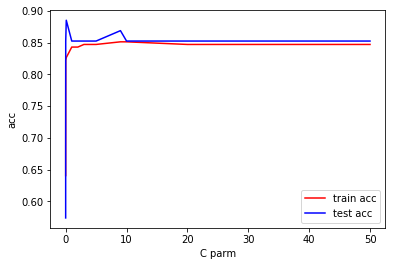

In [329]:
%matplotlib inline
plt.plot(c_value,train_list,'r-',label='train acc')
plt.plot(c_value,test_list,'b-',label='test acc')
plt.xlabel('C parm')
plt.ylabel('acc')
plt.legend()
plt.show()